In [47]:
import numpy as np
import matplotlib.pyplot as plt
from helping import rcparams, format_axis, format_axis_im
rcparams(1)

# Minkowski log-log Plot

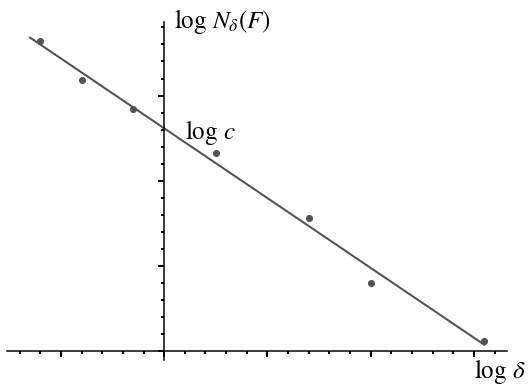

In [37]:
x = np.array([-1.2, -0.8, -0.3, 0.5, 1.4, 2.0, 3.1])
y = x * -0.8 + 2.5
y += np.random.RandomState(0).randn(len(x)) * 0.1
a, b = np.polyfit(x, y, deg=1)
xx = np.arange(-1.3, 3.2, 0.1)
yy = a * xx + b

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.plot(xx, yy)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.2, 2.5, 'log $c$')
ax.text(0.1, 3.8, 'log $N_{\delta}(F)$')
ax.text(3, -0.3, 'log $\delta$')

format_axis(ax)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()

plt.savefig('/Users/sjiang87/Desktop/workingpaper/LC_texture/fig/si_log_log.png', dpi=300, bbox_inches='tight')

# Box-counting Method

In [112]:
import porespy as ps
np.random.seed(0)
im = ps.generators.blobs(shape=[128, 128], porosity=0.2)
im = im.astype('int')

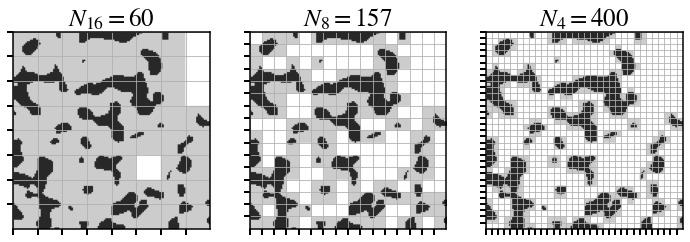

In [117]:
def box_count(window):
    box = np.zeros_like(im)
    count = 0
    for i in np.arange(0, 128, window):
        for j in np.arange(0, 128, window):
            if im[i:i+window, j:j+window].sum() != 0:
                count += 1
                box[i:i+window, j:j+window] = 1
    return box, count

windows = [16, 8, 4]
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
for i in range(3):
    box, count = box_count(windows[i])
    ax[i].imshow(im, cmap='gray_r', alpha=0.8)
    ax[i].imshow(box, cmap='gray_r', alpha=0.2)
    ax[i].set_xticks(np.arange(0, 128, windows[i])-0.5)
    ax[i].set_yticks(np.arange(0, 128, windows[i])-0.5)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].grid()
    ax[i].set_title(f'$N_{{{windows[i]}}}={count}$', fontsize=25)
    format_axis_im(ax[i])
plt.savefig('/Users/sjiang87/Desktop/workingpaper/LC_texture/fig/si_box_count.png', dpi=300, bbox_inches='tight')

# M0, M1, M2

In [149]:
import porespy as ps
from pylc.topology import minkowski
np.random.seed(0)
im = ps.generators.blobs(shape=[128, 128], porosity=None, blobiness=[1, 1]).astype('float')
th = np.arange(-0.1, 1.11, 0.01)
mk = minkowski(im, th)

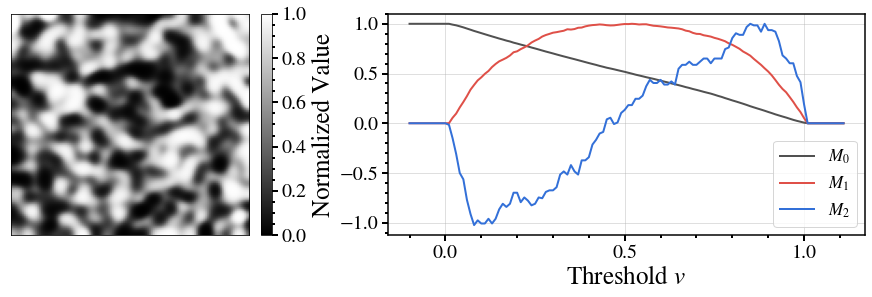

In [173]:
fig = plt.figure(figsize=(12, 4), constrained_layout=True)
spec = fig.add_gridspec(1, 3)

ax0 = fig.add_subplot(spec[0, 0])
img = ax0.imshow(im, cmap='gray', aspect='auto')
ax0.set_xticks([])
ax0.set_yticks([])
c = plt.colorbar(img, ax=ax0)
format_axis(c.ax)

labels = ['$M_0$', '$M_1$', '$M_2$']
ax1 = fig.add_subplot(spec[0, 1:])
for i in range(mk.shape[-1]):
    mk_ = mk[:, i] / mk[:, i].max()
    ax1.plot(th, mk_, label=labels[i])
ax1.set_xlabel('Threshold $v$')
ax1.set_ylabel('Normalized Value')
ax1.grid(alpha=0.5)
ax1.legend()
format_axis(ax1)
plt.savefig('/Users/sjiang87/Desktop/workingpaper/LC_texture/fig/si_m0m1m2.png', dpi=300, bbox_inches='tight')

# Fractal Dimension and Lacunarity

In [183]:
import porespy as ps
from pylc.topology import fractal_dimension
np.random.seed(0)
im = ps.generators.blobs(shape=[128, 128], porosity=None, blobiness=[1, 1]).astype('float')
th = np.arange(-0.1, 1.11, 0.01)
fm = fractal_dimension(im, th)

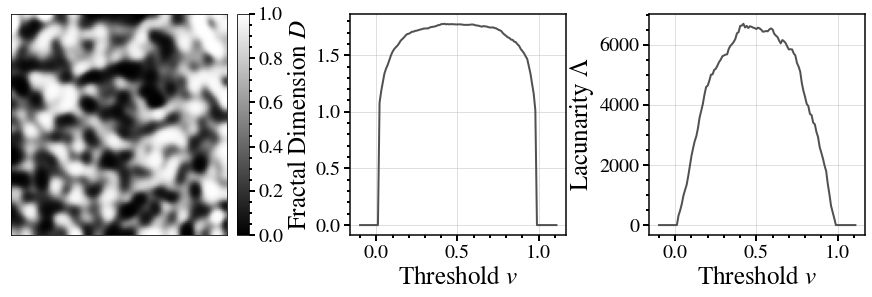

In [190]:
fig = plt.figure(figsize=(12, 4), constrained_layout=True)
spec = fig.add_gridspec(1, 3)

ax0 = fig.add_subplot(spec[0, 0])
img = ax0.imshow(im, cmap='gray', aspect='auto')
ax0.set_xticks([])
ax0.set_yticks([])
c = plt.colorbar(img, ax=ax0)
format_axis(c.ax)

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot(th, fm[0])
ax1.set_xlabel('Threshold $v$')
ax1.set_ylabel('Fractal Dimension $D$')
ax1.grid(alpha=0.5)
format_axis(ax1)

ax2 = fig.add_subplot(spec[0, 2])
ax2.plot(th, fm[1])
ax2.set_xlabel('Threshold $v$')
ax2.set_ylabel('Lacunarity $\Lambda$')
ax2.grid(alpha=0.5)
format_axis(ax2)

plt.savefig('/Users/sjiang87/Desktop/workingpaper/LC_texture/fig/si_fm.png', dpi=300, bbox_inches='tight')